In [18]:
import pandas as pd
import numpy as np


In [19]:
print(None or True,
      None or False,
      None==None,
      None is None,
      type(None), sep='\n')

True
False
True
True
<class 'NoneType'>


## Numpy

In [20]:
print(np.nan or True,
      np.nan or False,
      np.nan==np.nan,
      np.nan is np.nan,
      type(np.nan), sep='\n')


nan
nan
False
True
<class 'float'>


In [21]:
prueba_faltantes = pd.DataFrame.from_dict(data=dict(x=[0,1,np.nan, np.nan, None],
                                                    y=[0,1,pd.NA, np.nan, None]))
prueba_faltantes

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [22]:
prueba_faltantes.isna()


,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [23]:
pd.Series([pd.to_datetime('2022-01-01'),np.nan]) # Faltante en unidad de tiempo = NaT

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [24]:
%pip install pyjanitor
%pip install missingno
%pip install pyreadr
%pip install session_info
%pip install UpSetPlot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import warnings
warnings.filterwarnings('ignore')
import janitor
import matplotlib.pyplot as plt
import missingno as msno
import pyreadr
import session_info
import seaborn as sns
import upsetplot

In [26]:
%run ./explore_tools//pandas-missing-extension.ipynb

In [27]:
resultado=pyreadr.read_r('./explore_tools/riskfactors.rda')
datos_riesgo=resultado['riskfactors']
datos_riesgo.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [28]:
datos_riesgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

In [29]:
datos_riesgo.shape

(245, 34)

In [30]:
datos_riesgo.isna().sum()/datos_riesgo.shape[0]

state               0.000000
sex                 0.000000
age                 0.000000
weight_lbs          0.040816
height_inch         0.008163
bmi                 0.044898
marital             0.004082
pregnant            0.877551
children            0.000000
education           0.004082
employment          0.000000
income              0.000000
veteran             0.012245
hispanic            0.008163
health_general      0.000000
health_physical     0.000000
health_mental       0.000000
health_poor         0.461224
health_cover        0.000000
provide_care        0.012245
activity_limited    0.012245
drink_any           0.008163
drink_days          0.546939
drink_average       0.551020
smoke_100           0.008163
smoke_days          0.522449
smoke_stop          0.865306
smoke_last          0.657143
diet_fruit          0.032653
diet_salad          0.032653
diet_potato         0.032653
diet_carrot         0.032653
diet_vegetable      0.032653
diet_juice          0.032653
dtype: float64

In [31]:
datos_riesgo.missing.number_complete()

7144

In [32]:
datos_riesgo.missing.number_missing()

1186

In [33]:
datos_riesgo.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [34]:
#datos_riesgo.missing.missing_variable_table()

In [35]:
# Cantidad de registros con respecto a la cantidad de variables nulas (por filas)
datos_riesgo.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


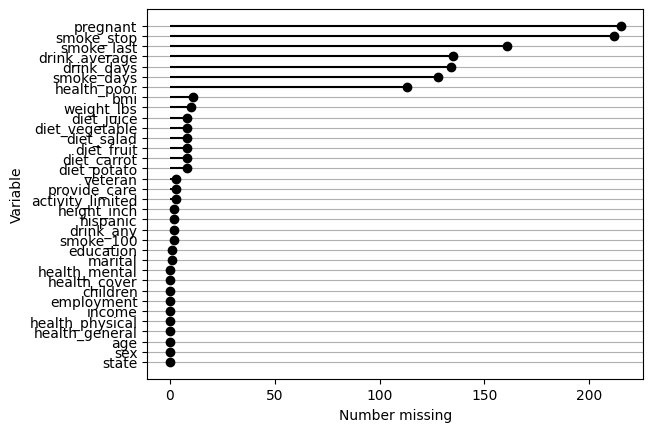

In [36]:
# Visualizacion de datos faltantes
datos_riesgo.missing.missing_variable_plot()

<Axes: >

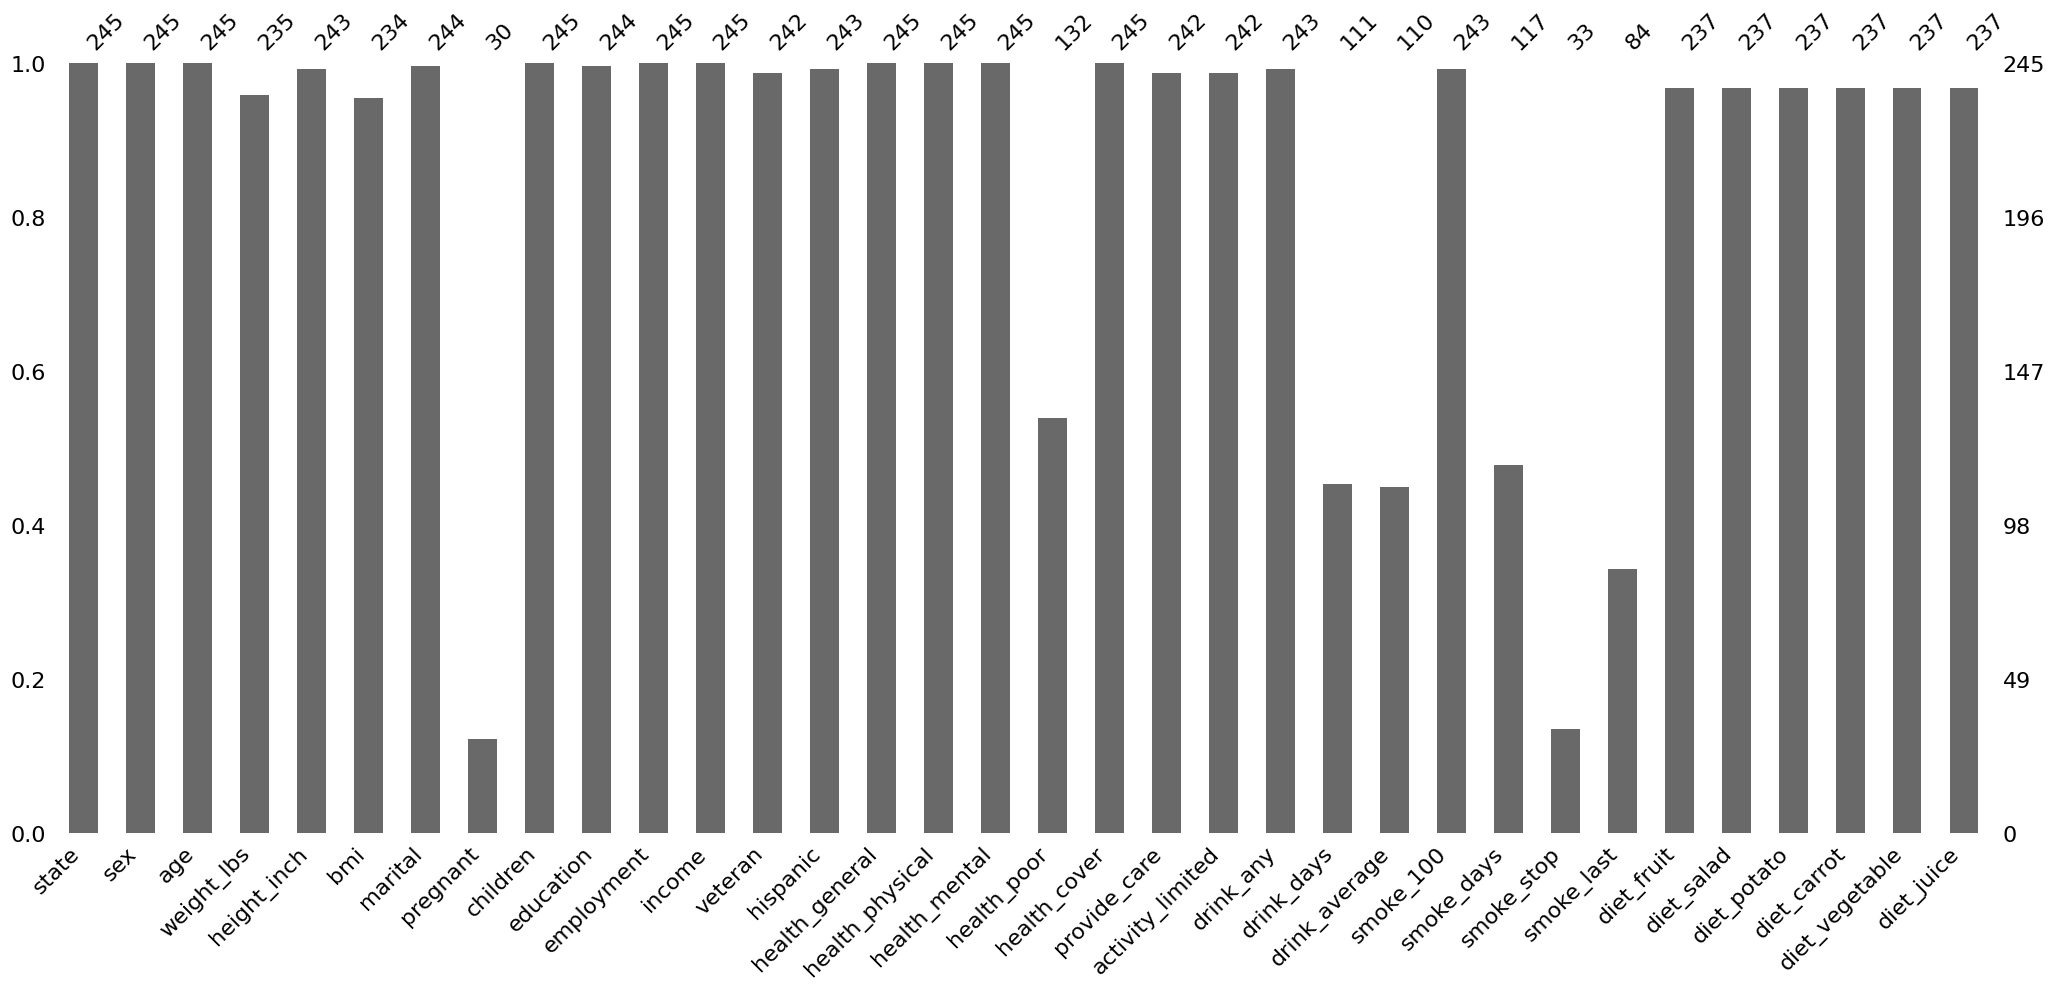

In [37]:
msno.bar(datos_riesgo)

<Axes: >

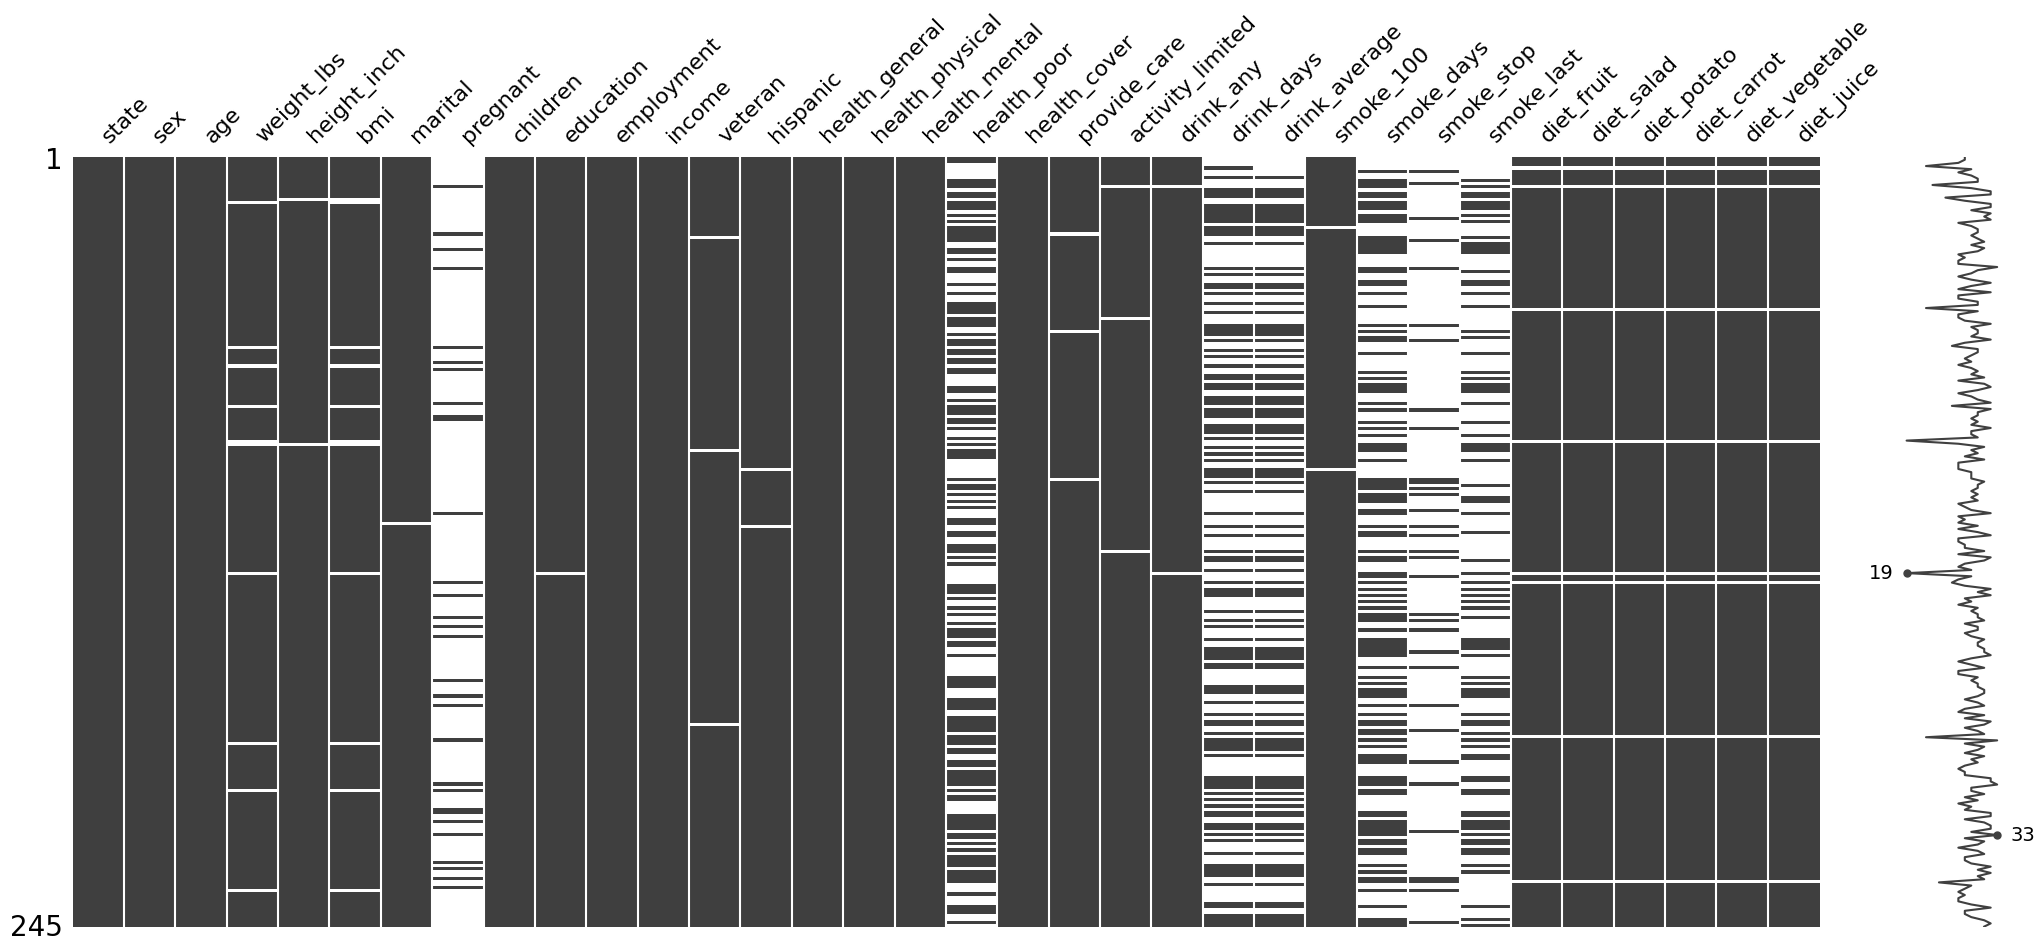

In [38]:
msno.matrix(datos_riesgo)

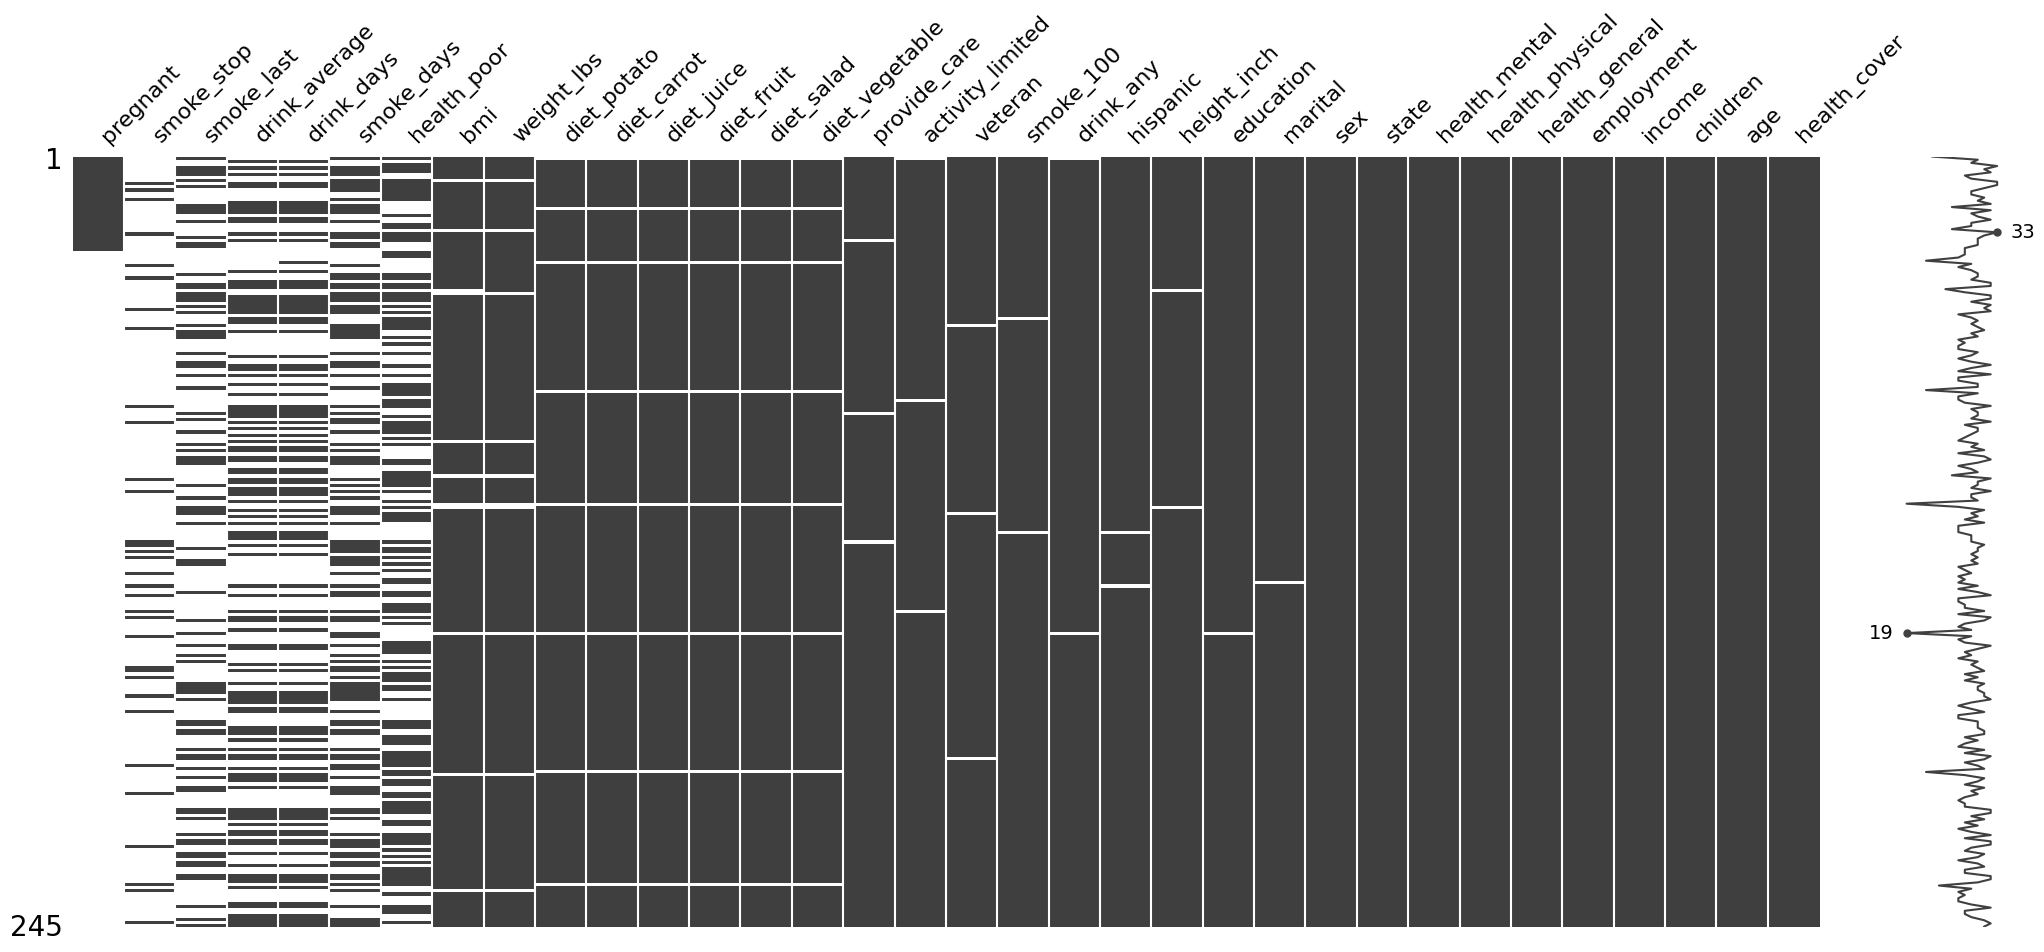

In [39]:
datos_riesgo.missing.sort_variables_by_missingness().sort_values(by='pregnant').pipe(msno.matrix)
plt.show()

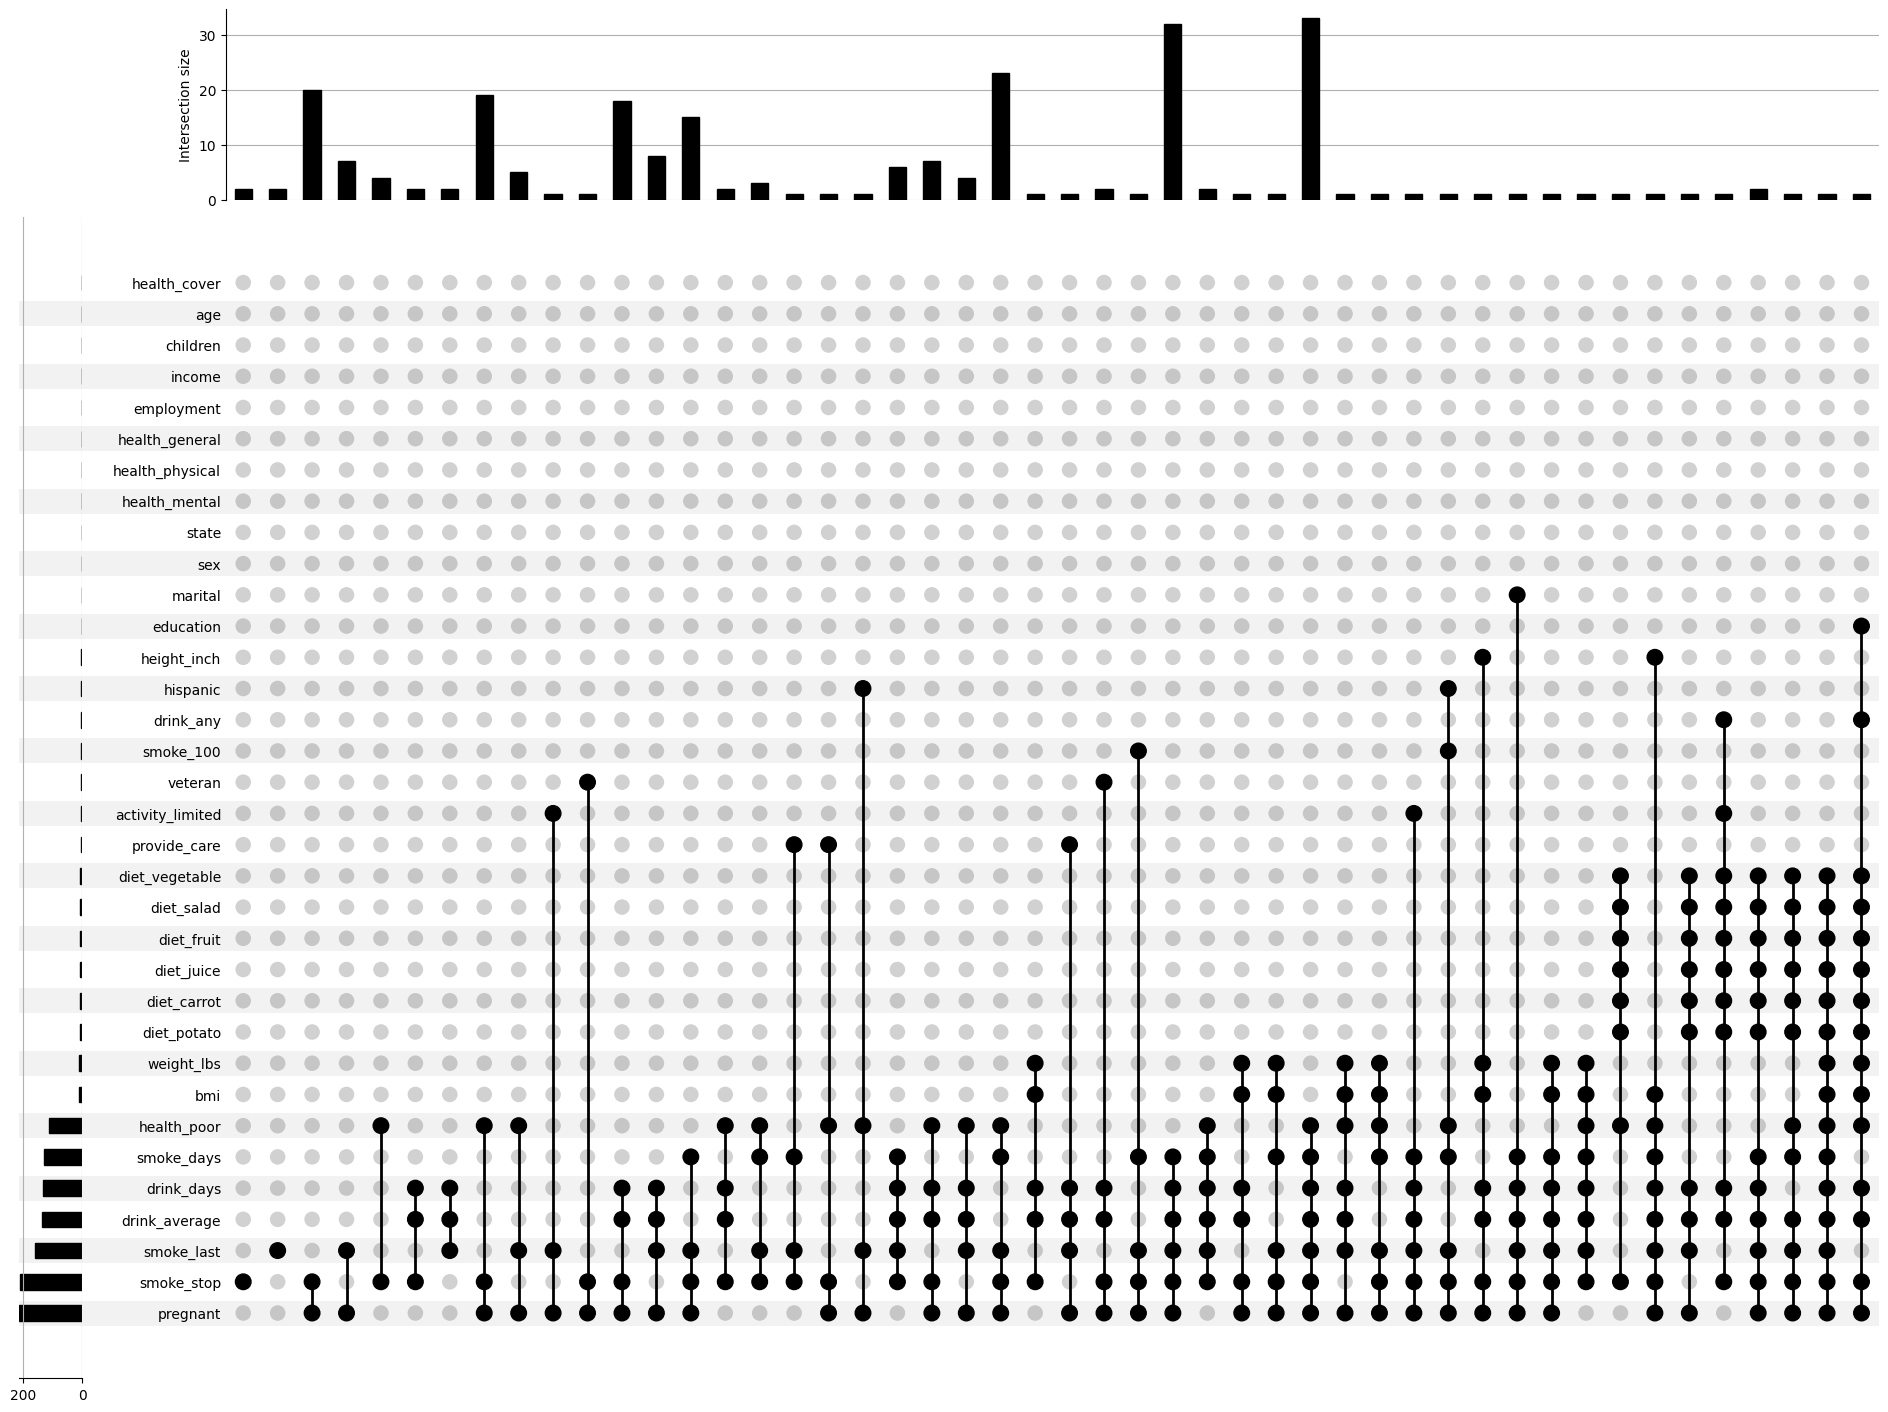

In [40]:
datos_riesgo.missing.missing_upsetplot(variables=None)
plt.show()
# La frecuencia de nulos en las variables representadas
#De la menos nula a la mas nula
# Cada columna es un intervalo de frecuencia ()
# en la tercera todo individuo que tiene pregnant nula, tambien tiene smoke stop nula

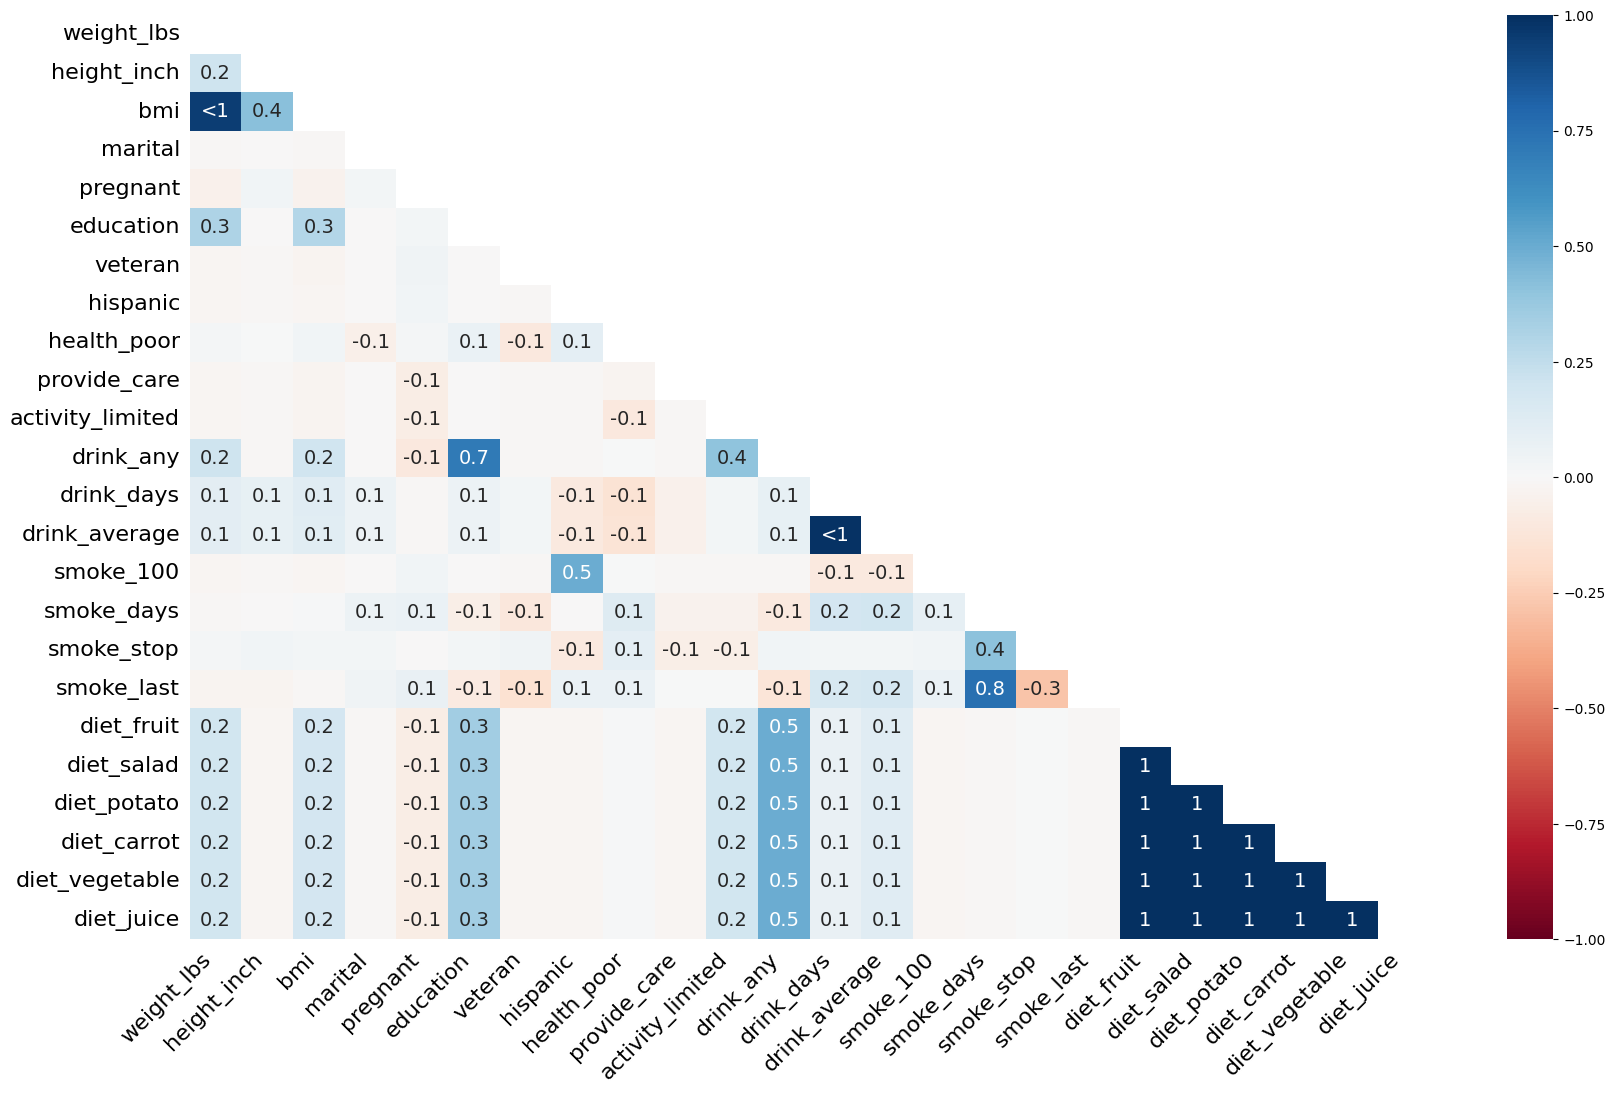

In [41]:
msno.heatmap(datos_riesgo)
plt.show()

In [42]:
datos_implicitos = pd.DataFrame.from_dict(data={'name':['lynn', 'lynn', 'lynn', 'zelda'],
                                                'time':['morning', 'afternoon', 'night', 'morning'],
                                                'value':[350,310,np.nan, 320]})
datos_implicitos

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


In [43]:
# Pivot table, tabla dinamica
datos_implicitos.pivot_wider(index='name', names_from='time', values_from='value')

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


In [44]:
datos_implicitos.complete('name', 'time')

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


In [45]:
# identificacion de tipos de datos nulos
names=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabetes_pedigree_function", "age", "outcome"]
datos = pd.read_csv("./explore_tools/pima-indians-diabetes.csv", header=None, names=names)
datos.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


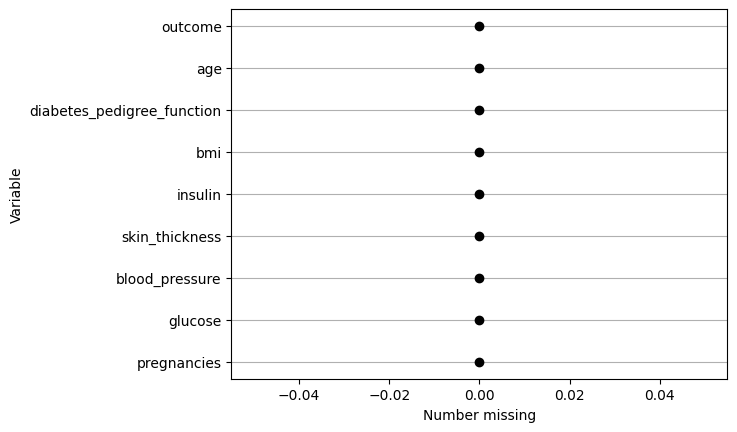

In [46]:
datos.missing.missing_variable_plot()

In [47]:
# Tenemos datos nulos oculos, ponen 0 mientras o si no aplica
datos.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
from IPython.display import display

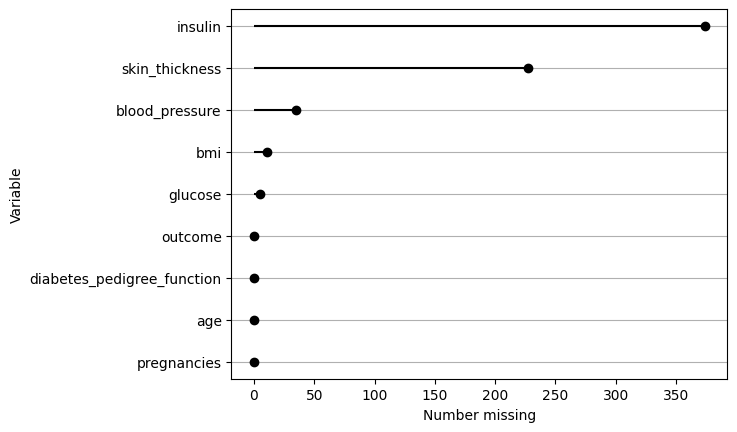

In [49]:
datos[datos.columns[1:6]]= datos[datos.columns[1:6]].replace(0, np.nan)
datos.missing.missing_variable_plot()

In [50]:
datos.missing.sort_variables_by_missingness()

,insulin,skin_thickness,blood_pressure,bmi,glucose,pregnancies,diabetes_pedigree_function,age,outcome
0,NaN,35.0,72.0,33.6,148.0,6,0.627,50,1
1,NaN,29.0,66.0,26.6,85.0,1,0.351,31,0
2,NaN,NaN,64.0,23.3,183.0,8,0.672,32,1
3,94.0,23.0,66.0,28.1,89.0,1,0.167,21,0
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,180.0,48.0,76.0,32.9,101.0,10,0.171,63,0
764,NaN,27.0,70.0,36.8,122.0,2,0.340,27,0
765,112.0,23.0,72.0,26.2,121.0,5,0.245,30,0
766,NaN,NaN,60.0,30.1,126.0,1,0.349,47,1


<Axes: >

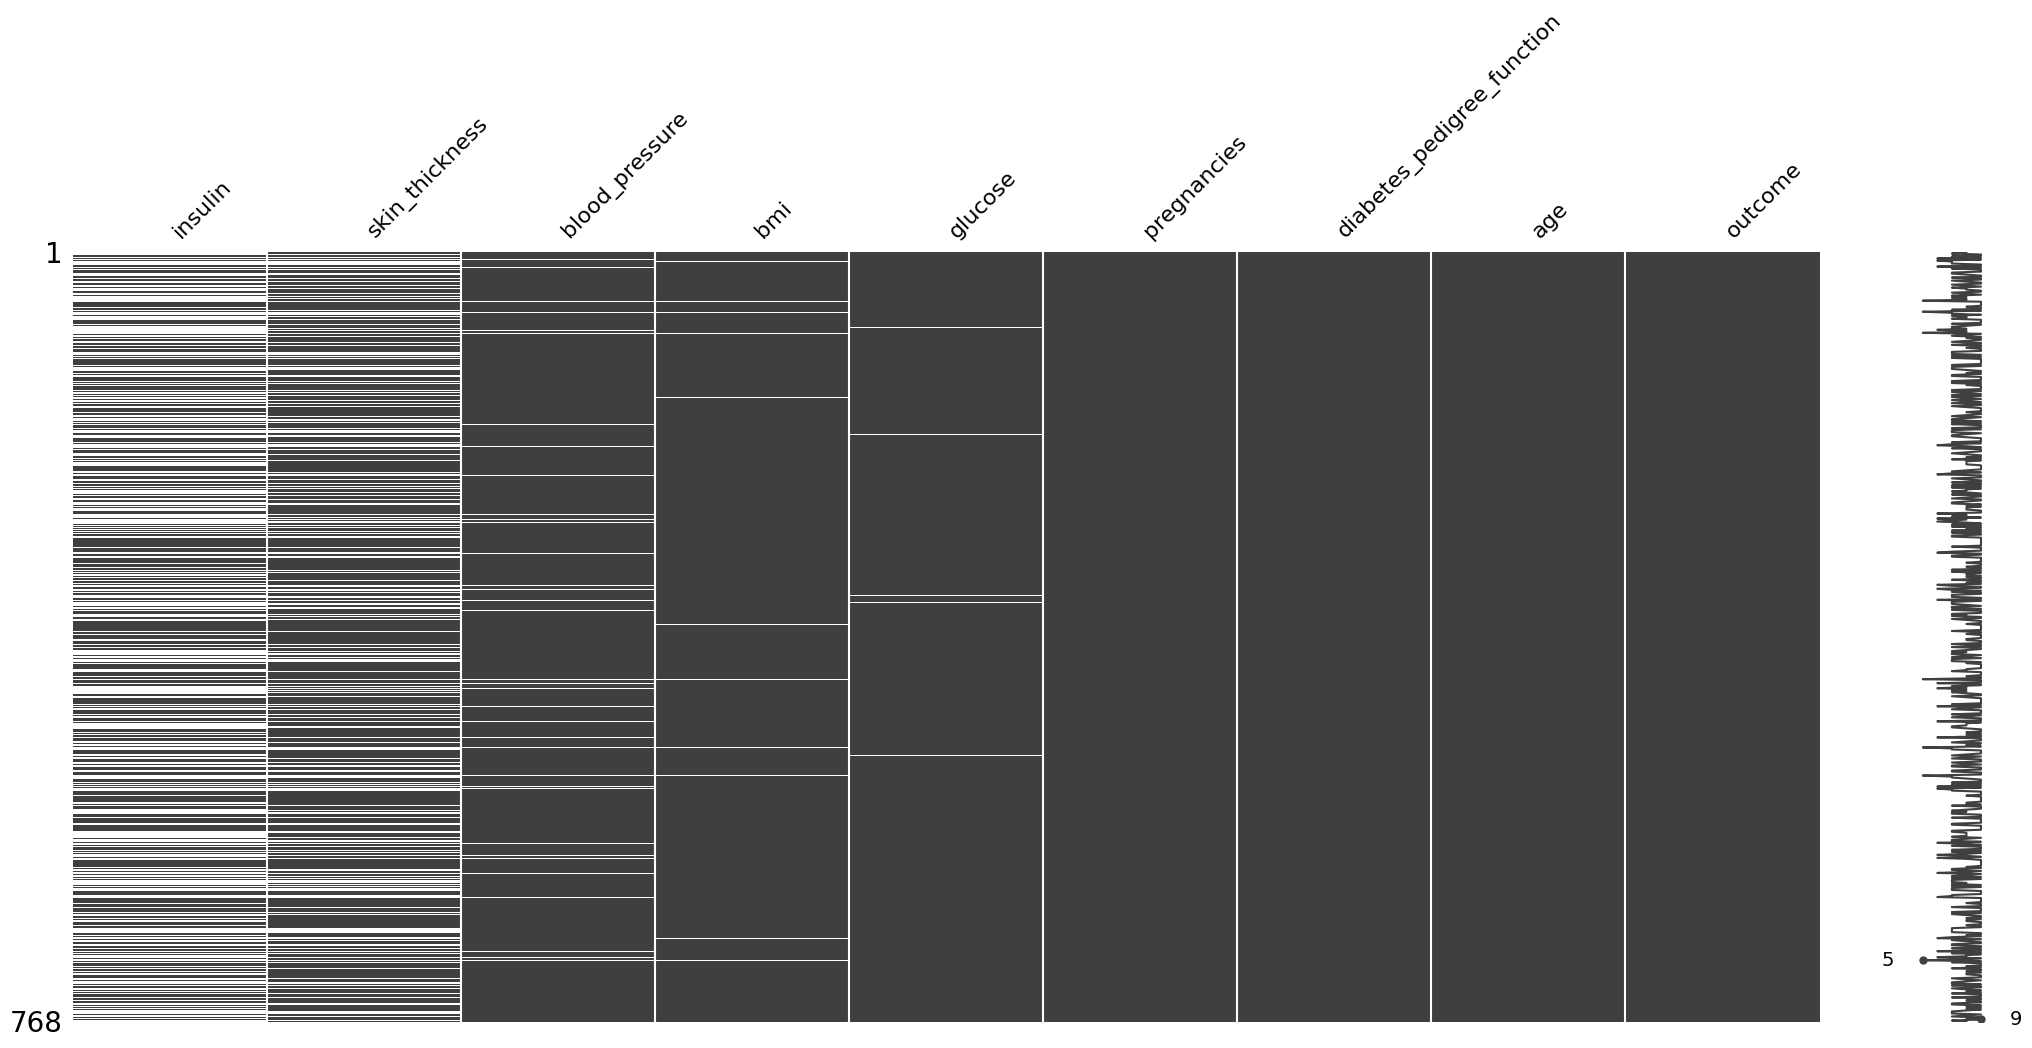

In [51]:
datos.missing.sort_variables_by_missingness().pipe(msno.matrix)

In [52]:
from scipy.stats import chi2
def little_mcar_test(data, alpha=0.05):
  data=pd.DataFrame(data)
  data.columns = ['x' + str(i) for i in range(data.shape[1])]
  data['missing'] = data.isna().sum(axis=1)
  n=data.shape[0]
  k=data.shape[1]-1
  df=k*(k-1)/2
  chi2_crit = chi2.ppf(1-alpha, df)
  chi2_val= ((n-1 -(k-1)/2)**2)/(k-1)/((n-k)*np.mean(data['missing']))
  p_val=1-chi2.cdf(chi2_val, df)
  if chi2_val>chi2_crit:
    print('Se rechaza la hipotesis nula: Los datos son MCAR (p_value={:.4f}, chi2_value={:.4f})'.format(p_val, chi2_val))
  else:
    print('No se rechaza la hipotesis nula: Los datos no son MCAR (p_value={:.4f}, chi2_value={:.4f})'.format(p_val, chi2_val))


In [53]:
little_mcar_test(datos, alpha=0.05)

Se rechaza la hipotesis nula: Los datos son MCAR (p_value=0.0000, chi2_value=112.9356)


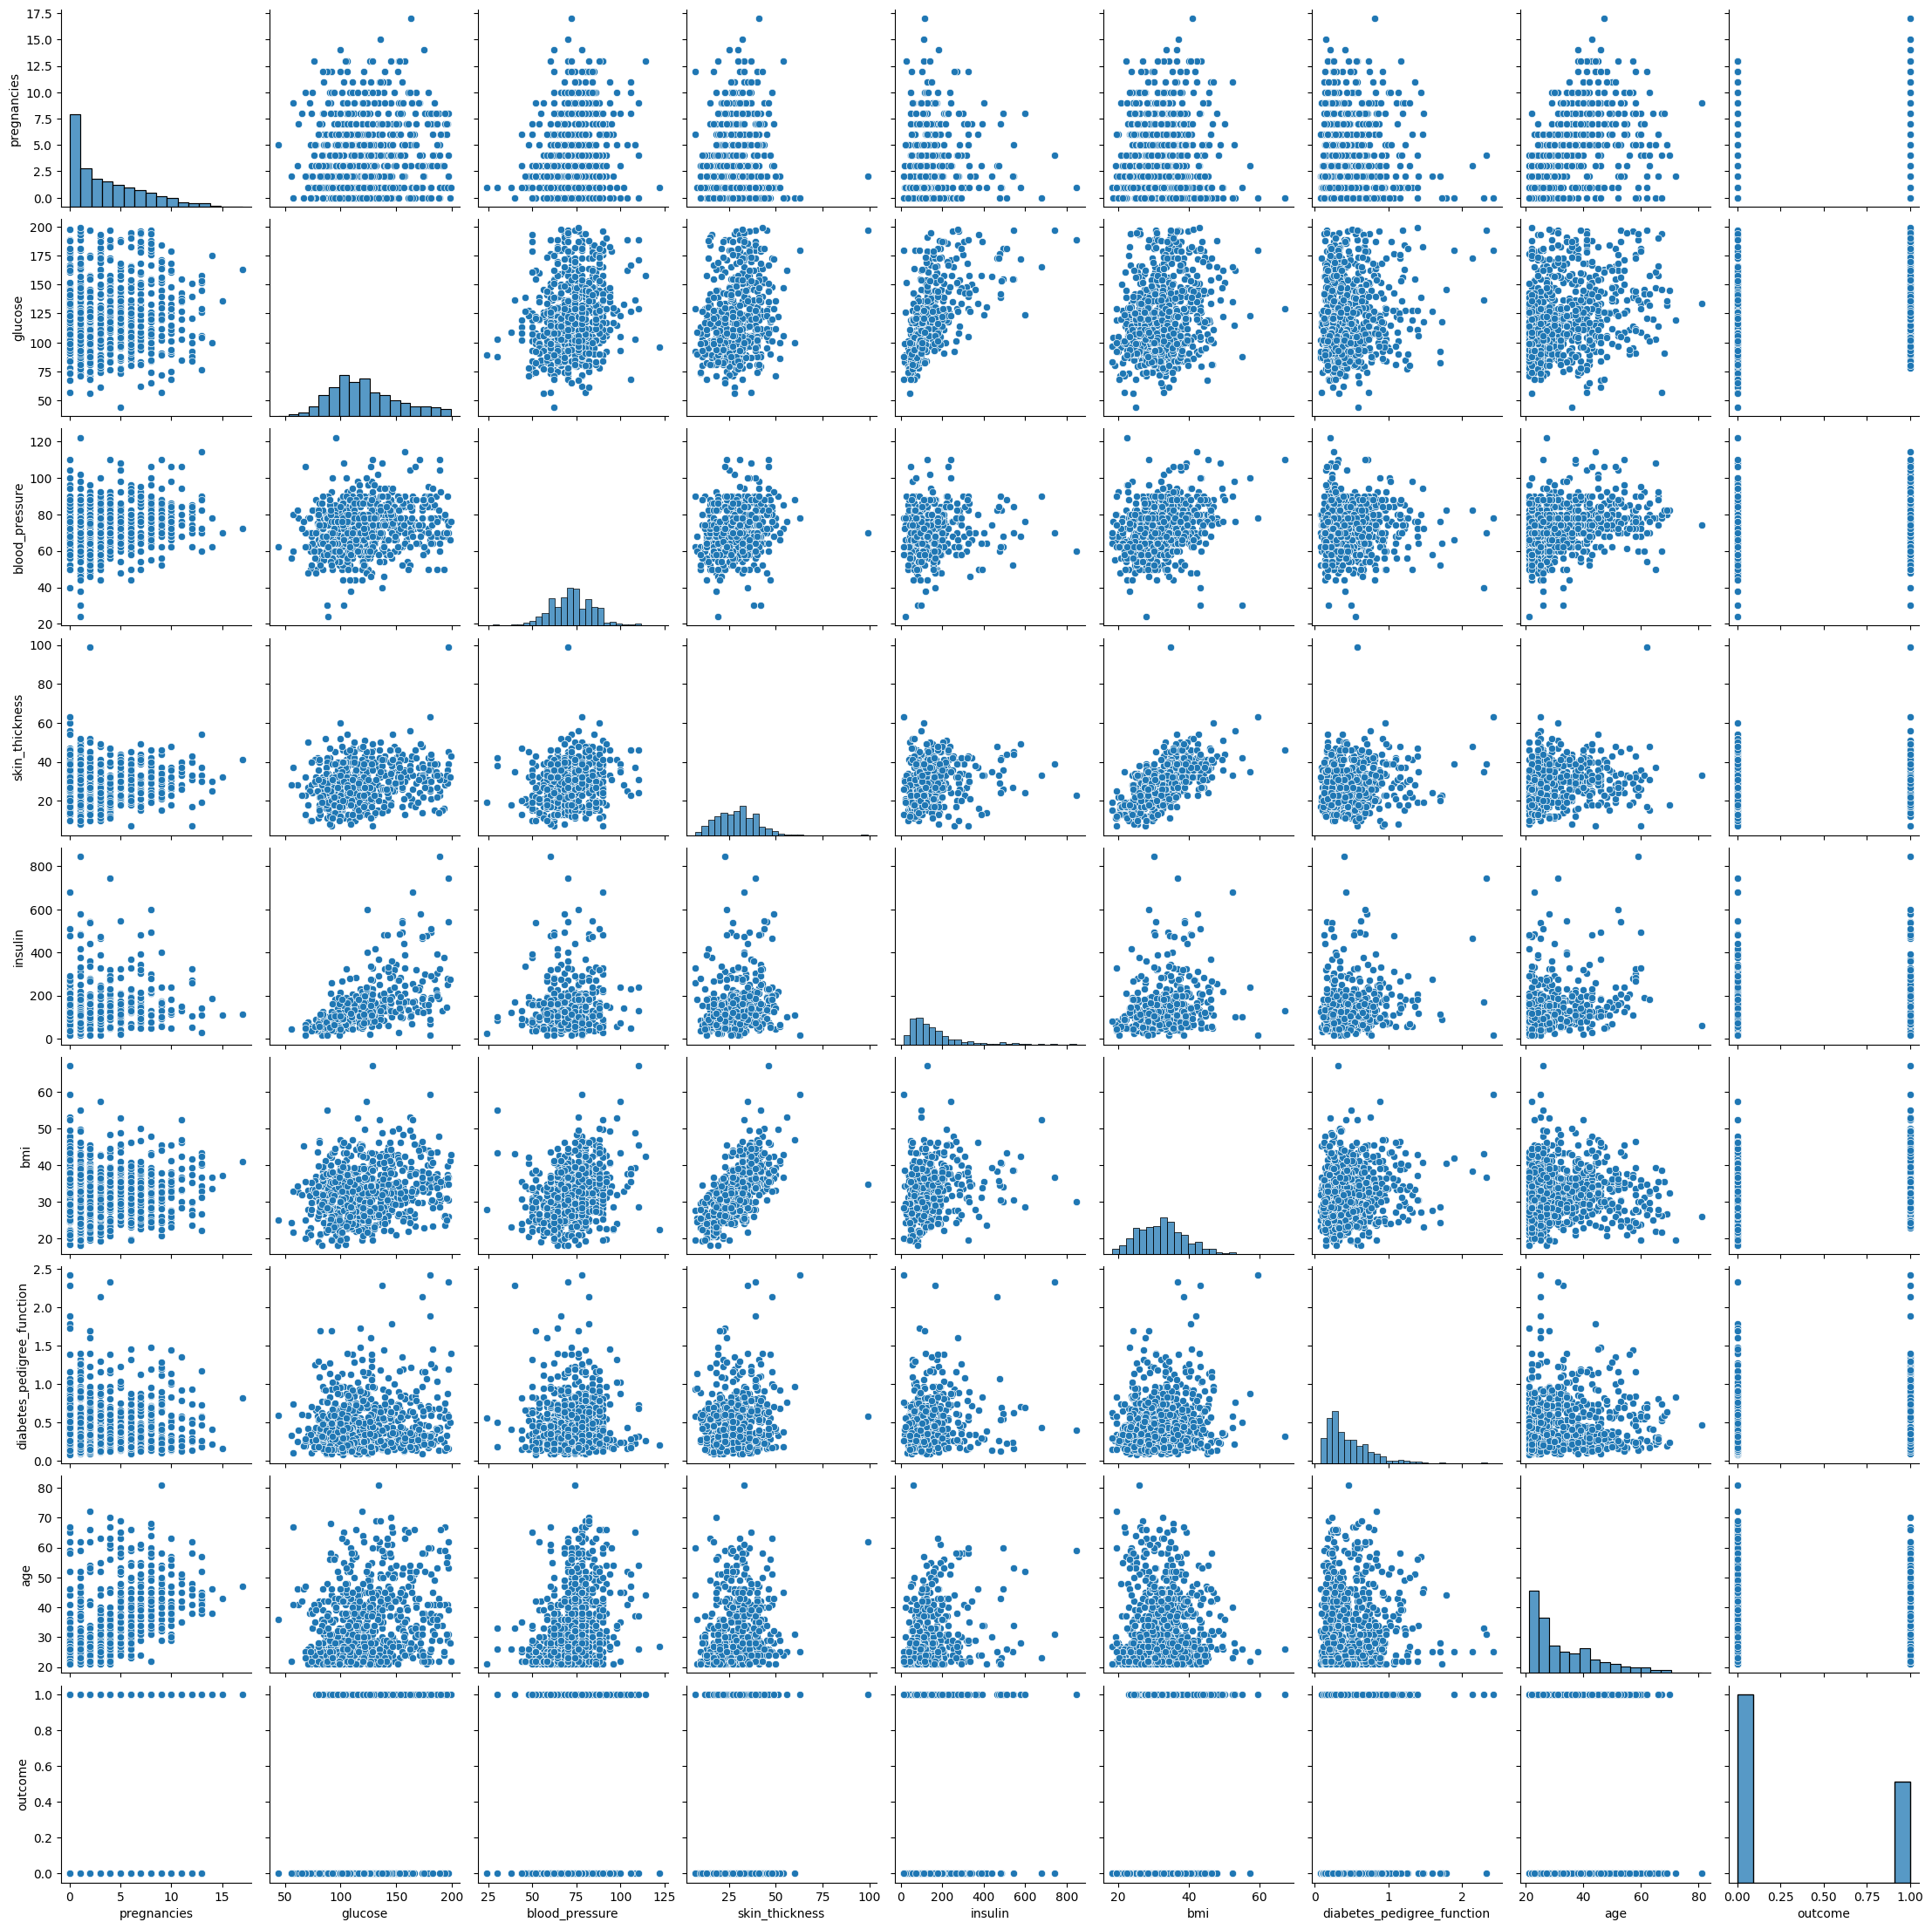

In [54]:
sns.pairplot(data=datos, kind='scatter')
# Muestra las correlaciones y en la diagonal principal está la distribucion de prob de cada variable
# Nos interesa: insulin, skin_thickness, blood_pressure, bmi, glucose

<Axes: >

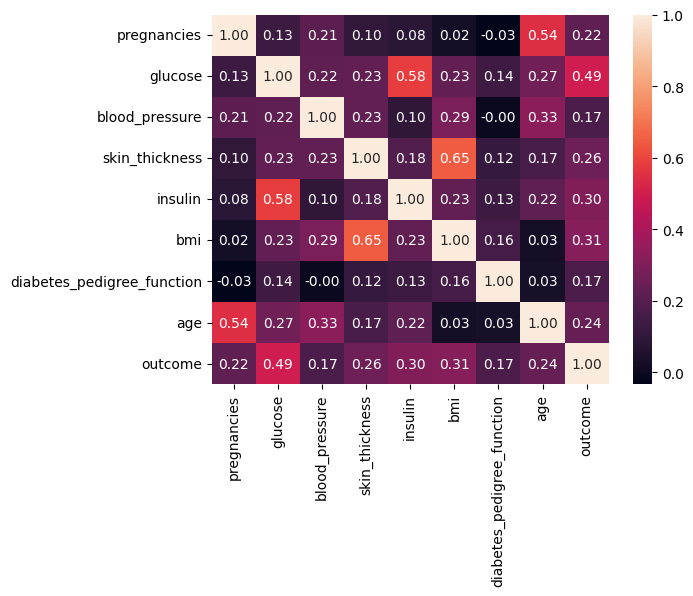

In [55]:
sns.heatmap(datos.corr(), annot=True, fmt='.2f') #0.2g mayor cantidad de decimales


In [56]:
# Datos con nulos:
# insulin: glucose -> MAR
# skin_thickness: bmi, -> MAR
# blood_pressure: NADA, -> MNAR
# bmi:skin_thickness, -> MNAR
# glucose: insulin -> MNAR (no se puede porque insulina tiene muchos nulos)

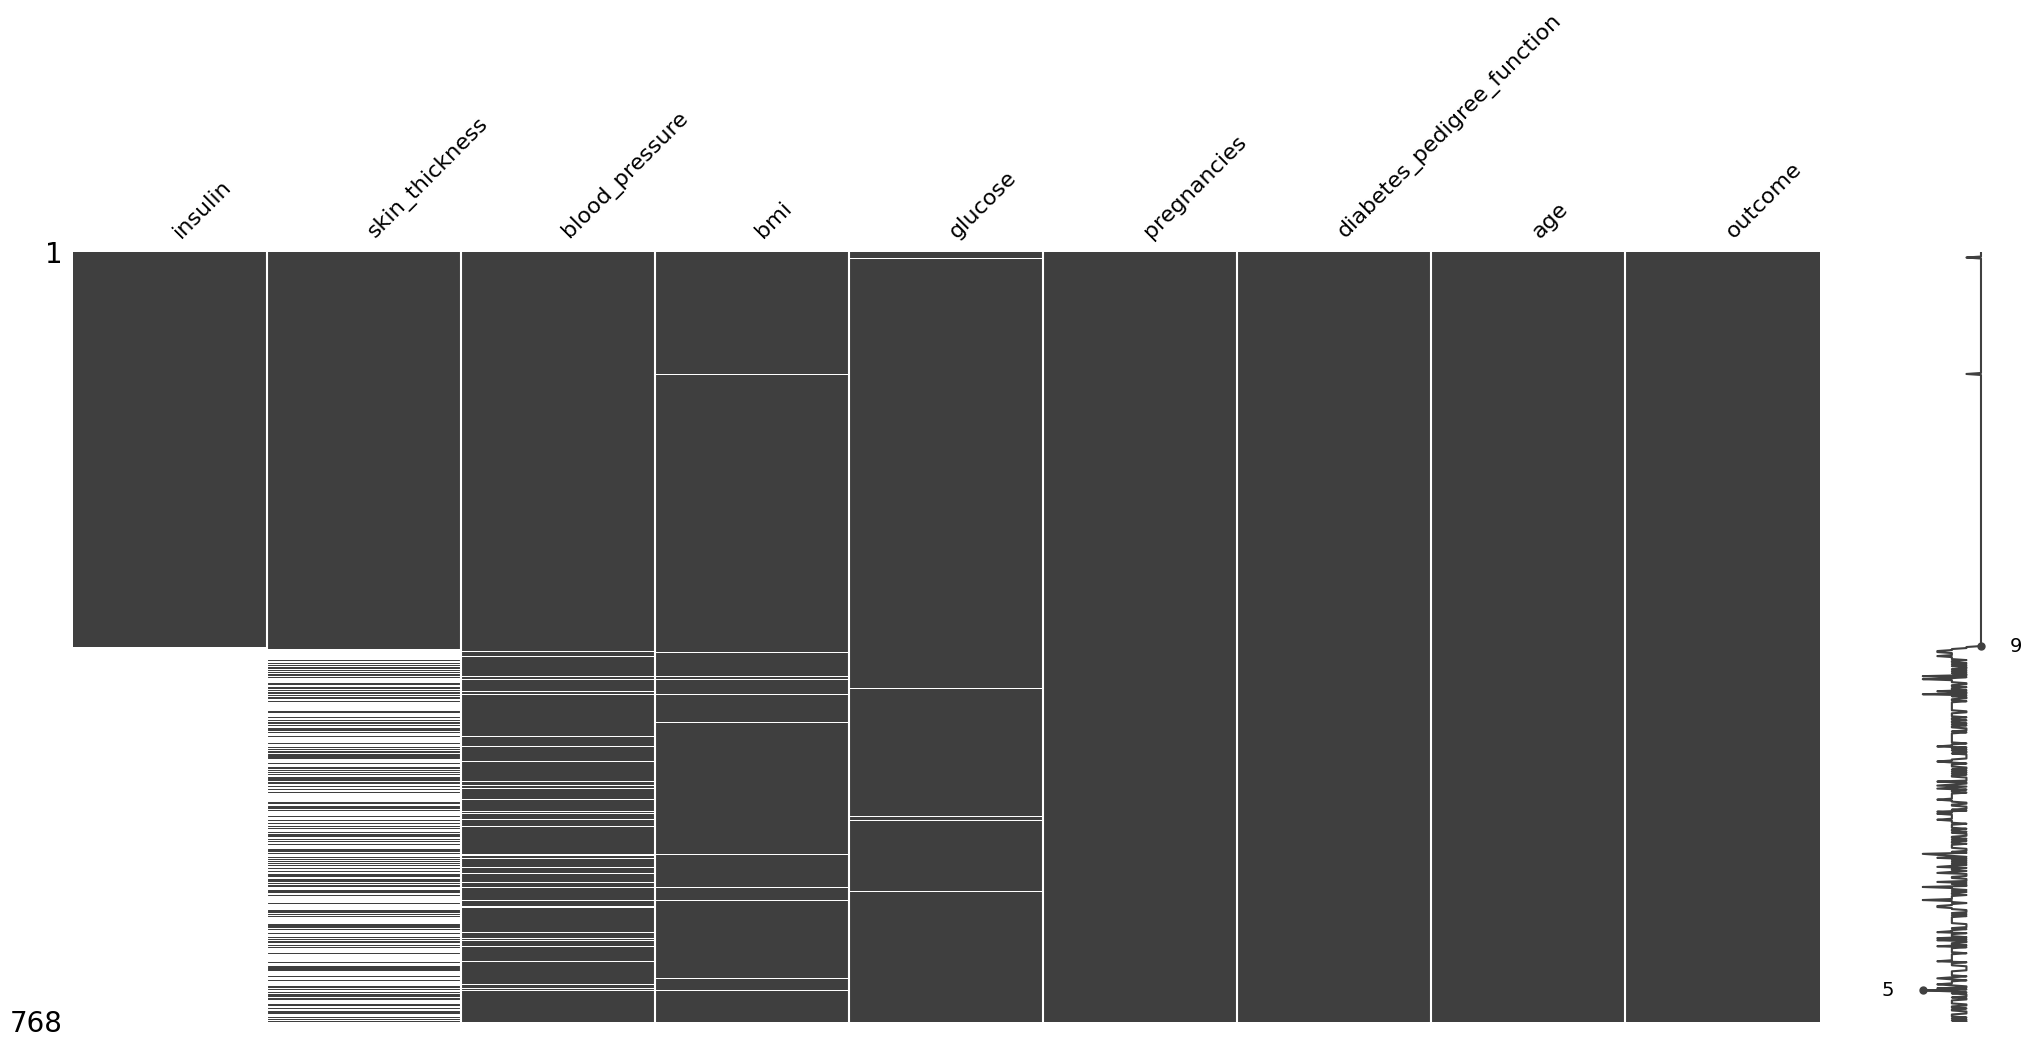

In [57]:
datos.missing.sort_variables_by_missingness().sort_values(by='insulin').pipe(msno.matrix)
plt.show()

In [58]:
little_mcar_test(datos[['insulin', 'age']], alpha=0.05)

Se rechaza la hipotesis nula: Los datos son MCAR (p_value=0.0000, chi2_value=1575.0167)
